<a href="https://colab.research.google.com/github/yucachen/MLTSA25_YChen/blob/main/HW7/autoencoder_time_series_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder for time series
an autoencoder is a deep neural network that reproduces input data

it does so by progressively shrinking the size of the layers from the input size to a bottle neck and then expanding them back progressively to the initial size

note: the input and target are the same!

put your imports in the top cell

In [ ]:
#Deep leaarning imports
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import pylab as pl
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense

get the data by cloaning the repo https://github.com/nlandolfi/acc2022treelinearcascades_stocks.git

In [ ]:
!git clone https://github.com/nlandolfi/acc2022treelinearcascades_stocks.git

Cloning into 'acc2022treelinearcascades_stocks'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 40 (delta 0), reused 40 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 1.25 MiB | 2.38 MiB/s, done.


These are stock price time series. Use the " Volume" column as your chosen time series

In [ ]:
ls

acc2022treelinearcascades_stocks/  sample_data/


In [ ]:
ls acc2022treelinearcascades_stocks/data

aapl.csv  cat.csv   dis.csv  hon.csv   jpm.csv  mrk.csv   trv.csv  wba.csv
amgn.csv  crm.csv   dow.csv  ibm.csv   ko.csv   msft.csv  unh.csv  wmt.csv
axp.csv   csco.csv  gs.csv   intc.csv  mcd.csv  nke.csv   v.csv
ba.csv    cvx.csv   hd.csv   jnj.csv   mmm.csv  pg.csv    vz.csv


check that all files have the same length. The system command `wc -l returns` the  number of lines (stands for "word count -lines")

In [ ]:
!wc -l acc2022treelinearcascades_stocks/data/*
!rm acc2022treelinearcascades_stocks/data/dow.csv #removing this one because it has 542 instead of 2516. Maybe make sure that's right before submitting?

   2516 acc2022treelinearcascades_stocks/data/aapl.csv
   2516 acc2022treelinearcascades_stocks/data/amgn.csv
   2516 acc2022treelinearcascades_stocks/data/axp.csv
   2516 acc2022treelinearcascades_stocks/data/ba.csv
   2516 acc2022treelinearcascades_stocks/data/cat.csv
   2516 acc2022treelinearcascades_stocks/data/crm.csv
   2516 acc2022treelinearcascades_stocks/data/csco.csv
   2516 acc2022treelinearcascades_stocks/data/cvx.csv
   2516 acc2022treelinearcascades_stocks/data/dis.csv
    542 acc2022treelinearcascades_stocks/data/dow.csv
   2516 acc2022treelinearcascades_stocks/data/gs.csv
   2516 acc2022treelinearcascades_stocks/data/hd.csv
   2516 acc2022treelinearcascades_stocks/data/hon.csv
   2516 acc2022treelinearcascades_stocks/data/ibm.csv
   2516 acc2022treelinearcascades_stocks/data/intc.csv
   2516 acc2022treelinearcascades_stocks/data/jnj.csv
   2516 acc2022treelinearcascades_stocks/data/jpm.csv
   2516 acc2022treelinearcascades_stocks/data/ko.csv
   2516 acc2022treelinearcas

In [ ]:
#create a list of all files you want to load
files = glob.glob("acc2022treelinearcascades_stocks/data/*")
#pd.read_csv(files[0])
files[1]

'acc2022treelinearcascades_stocks/data/wba.csv'

In [ ]:
#create a numpy array to host the data
data = np.zeros((np.shape(files)[0],len(pd.read_csv(files[1])))) # do not use hard coded numbers, use values calculated on the spot from the variables you have: the number of and shape of the files

In [ ]:
data.shape

(29, 2516)

 read in all the data into the array

In [ ]:
#remove
for i,f in tqdm(enumerate(files)):
    df = pd.read_csv(f)
    data[i,:] = df[' Volume'].values

29it [00:00, 239.32it/s]


plot the time series

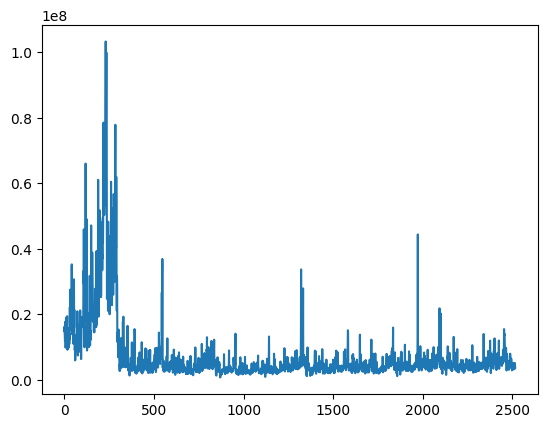

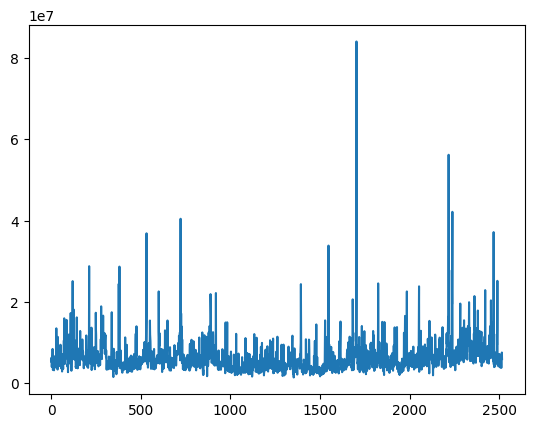

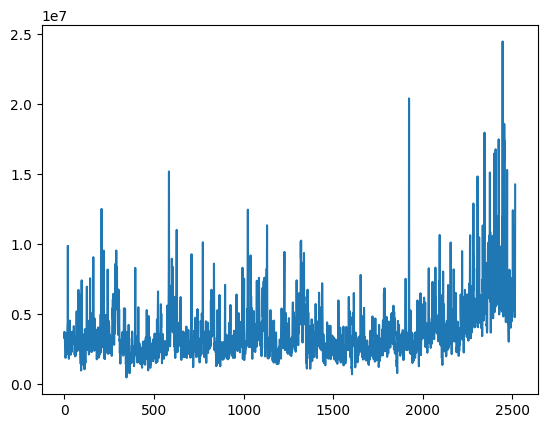

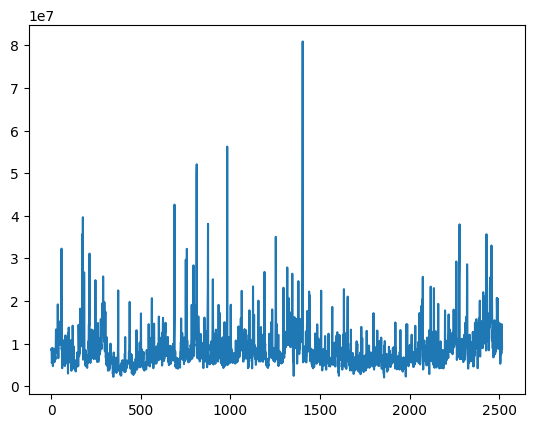

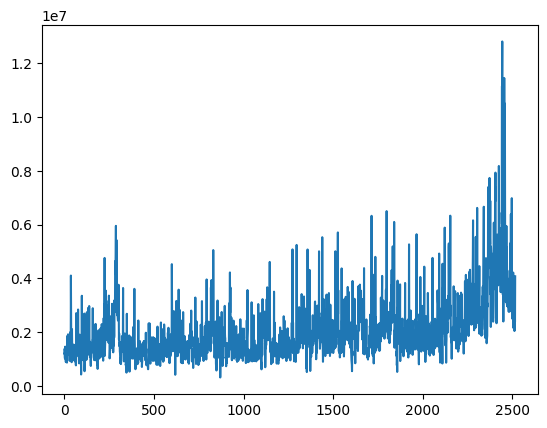

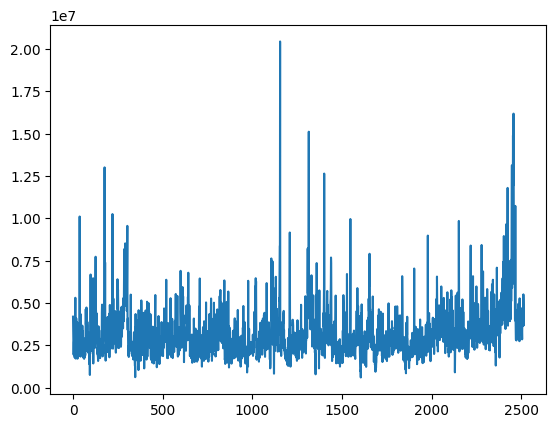

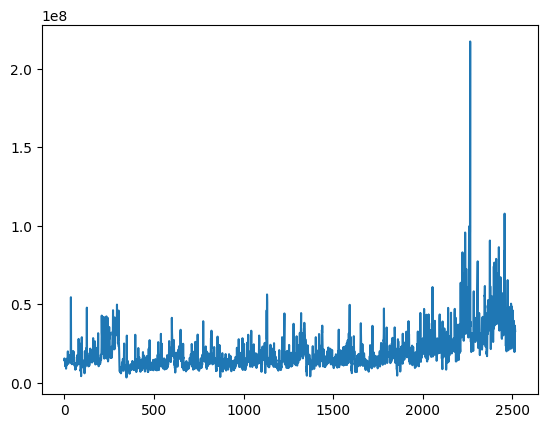

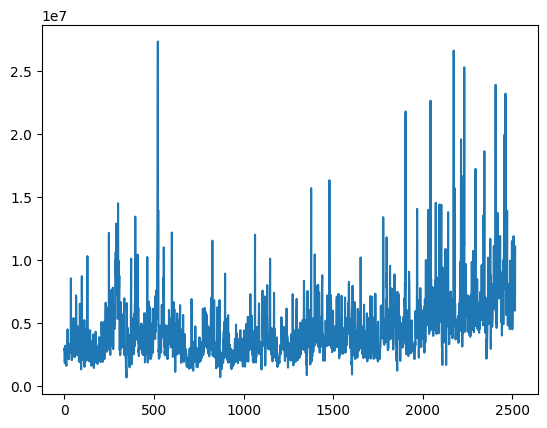

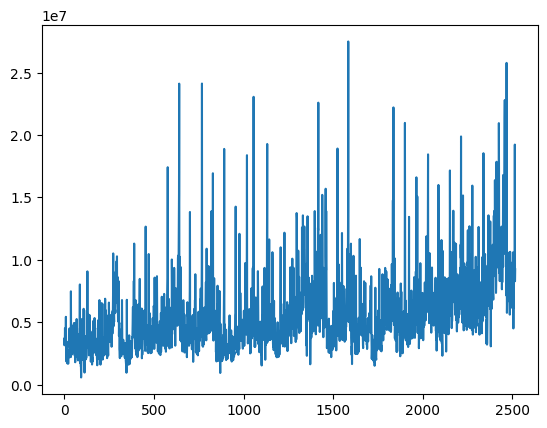

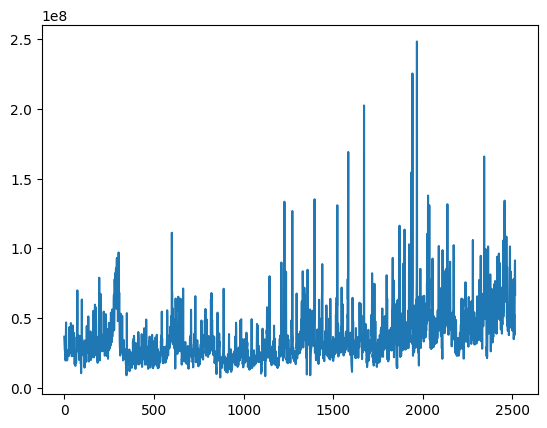

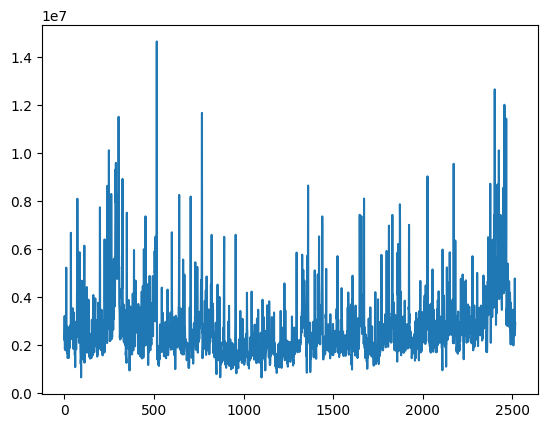

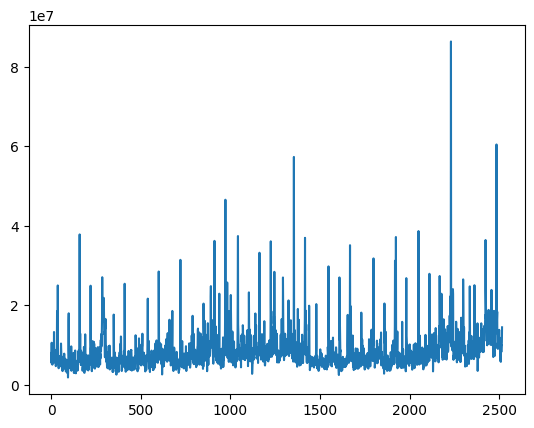

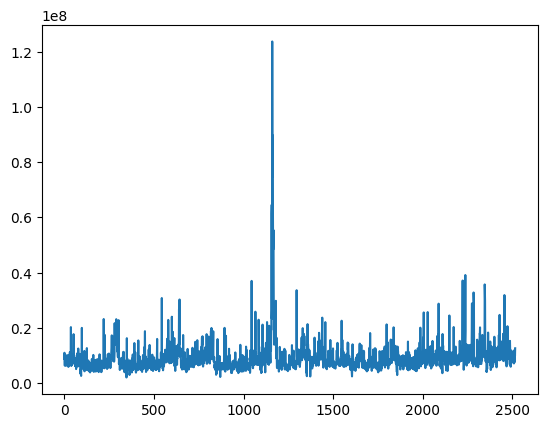

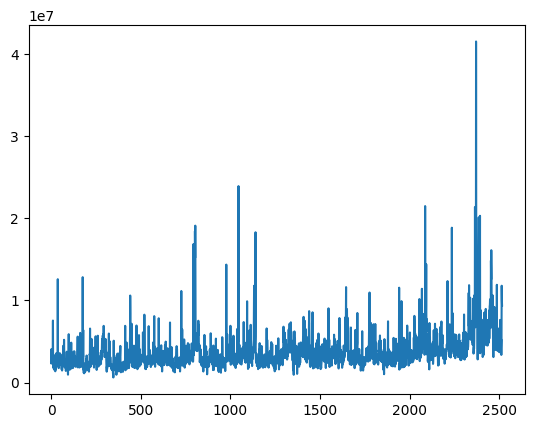

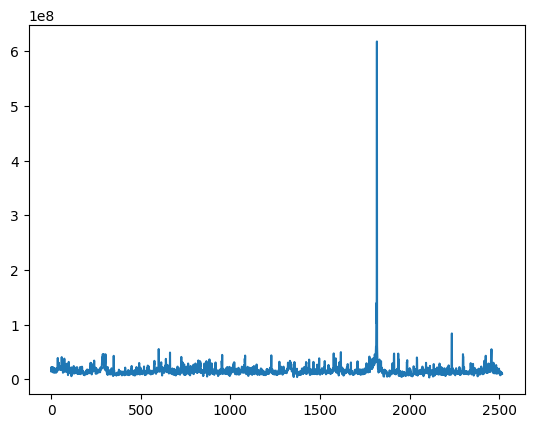

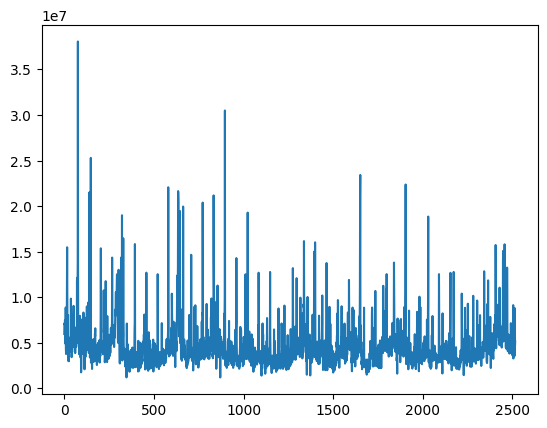

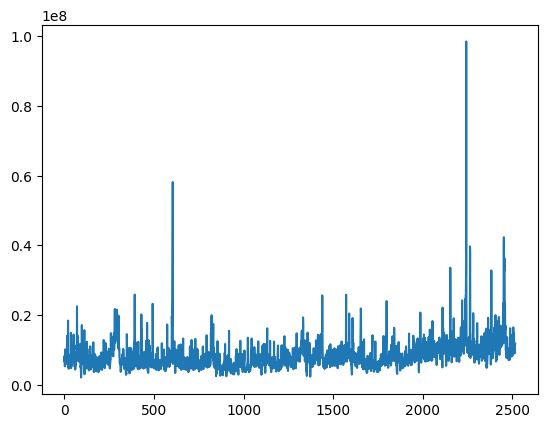

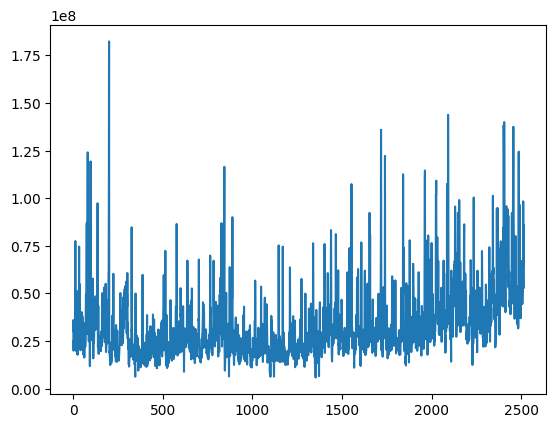

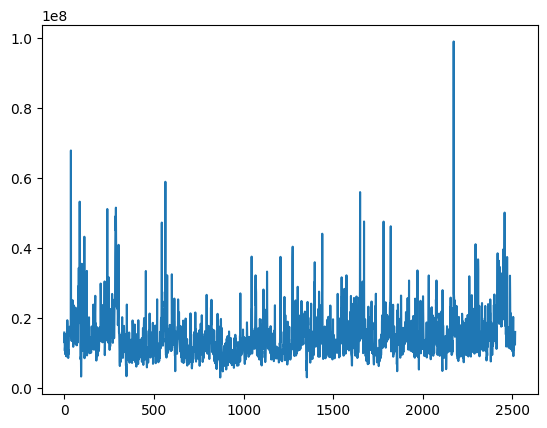

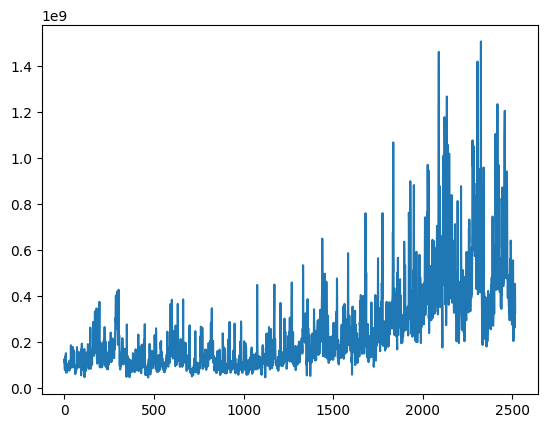

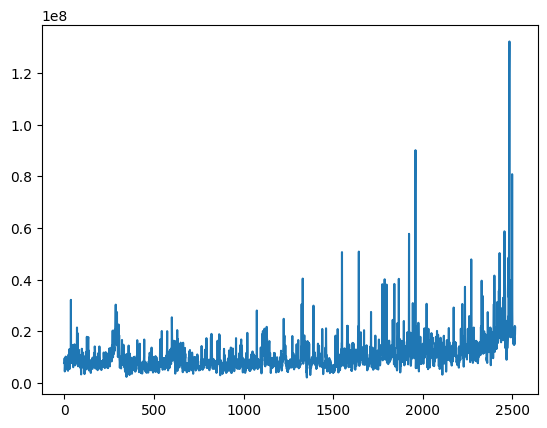

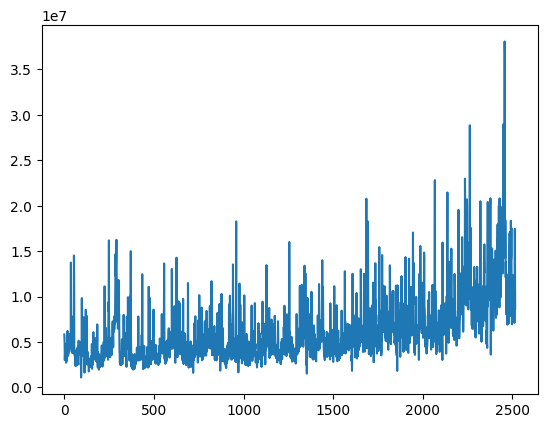

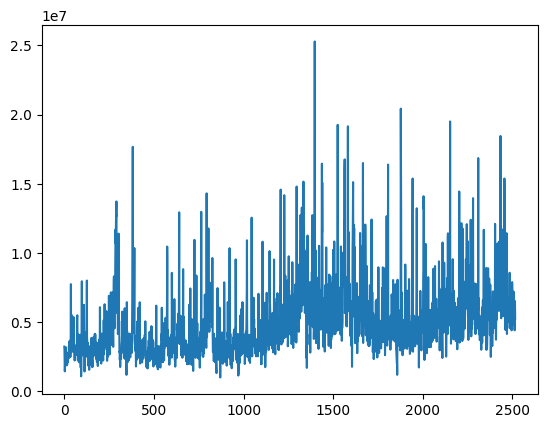

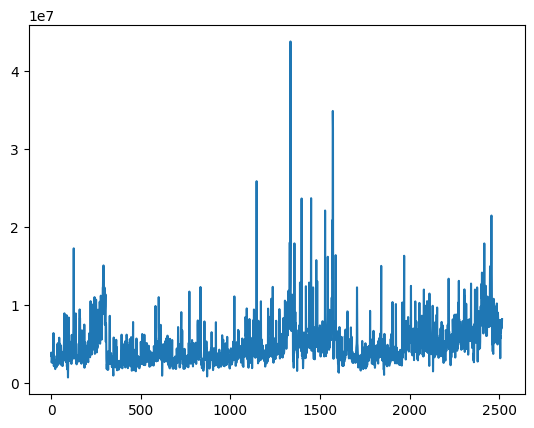

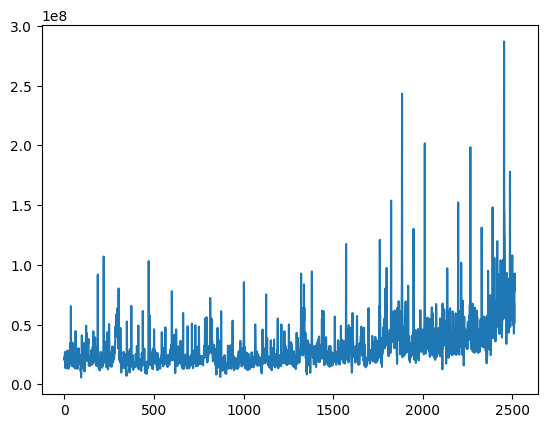

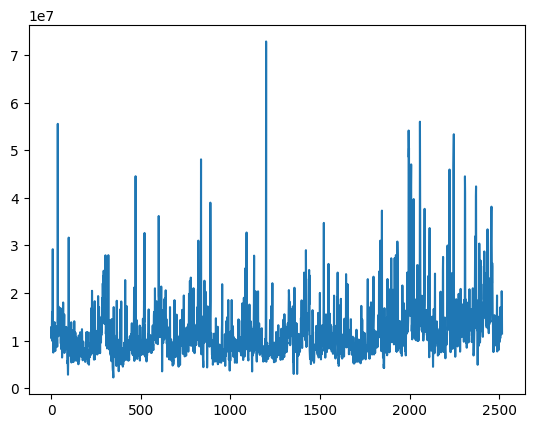

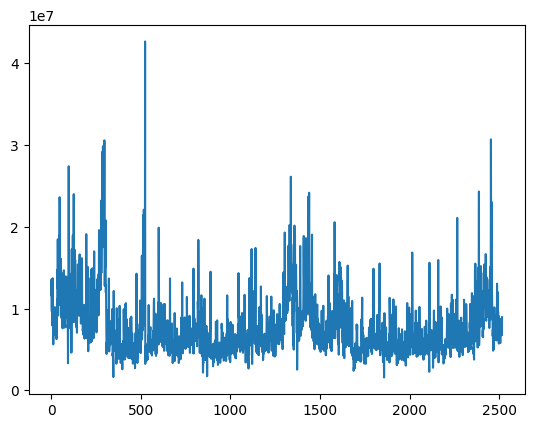

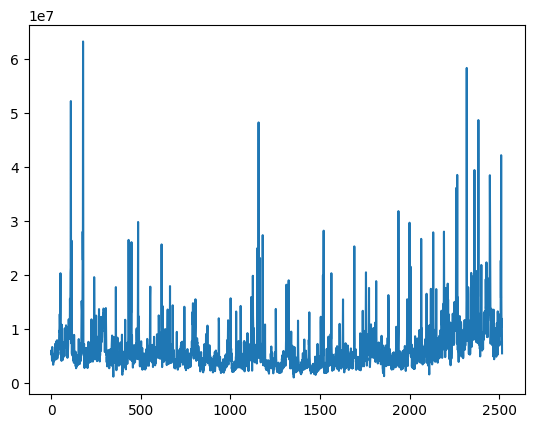

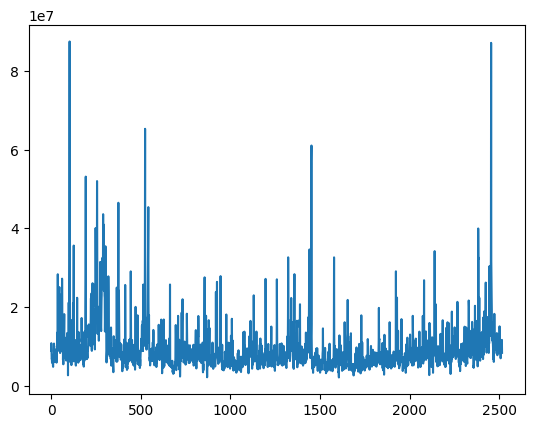

In [ ]:
for i in range(data.shape[0]):
  pl.plot(data[i,:])
  pl.show()
#pl.plot(data)

**Figure 1:** Stock prices as a function of time for different time series. Note that the magnitude of the stock prices ranges between 1e7 and 1e9. Flucturations are seen for every plotted time series. The general behavior of the data, aside from the fluctuations, seems to follow some periodic behavior. This is not unexpected, as stock price can fluctuate due to seasonal effects. Some time series also see a very clear maximum price (i.e. similar behavior to a delta function in comparison to the rest of the data), and some time series also seen a generaly increase in price outside of the fluctuations that are seen.

scale the time series appropriately
hint: use Standard Scaler to save the mean and standard deviation of each time series, that way you can apply them later to your predicted results

In [ ]:
scaler = StandardScaler()

data_t = data.transpose()
scaled_data_t = scaler.fit_transform(data_t)
scaled_data = scaled_data_t.transpose()

print(scaler.mean_)

[7.31825091e+06 6.22716013e+06 3.69958000e+06 8.56753041e+06
 2.00906164e+06 3.20954830e+06 1.95325344e+07 4.47784854e+06
 5.49183710e+06 3.61821291e+07 2.70803716e+06 8.38845291e+06
 9.05137382e+06 3.68032742e+06 1.57255425e+07 4.64859694e+06
 8.38605635e+06 3.23061745e+07 1.44888552e+07 2.41918808e+08
 1.07715065e+07 6.13210239e+06 4.83503569e+06 4.82569939e+06
 3.04478866e+07 1.16112013e+07 7.59459024e+06 6.39931196e+06
 9.22106420e+06]


In [ ]:
scaled_data.mean(axis=1)

array([ 0.00000000e+00,  7.90747083e-17, -6.77783214e-17,  8.47229017e-17,
        9.03710952e-17, -1.12963869e-17, -9.03710952e-17,  1.58149417e-16,
       -6.77783214e-17, -1.12963869e-16,  1.58149417e-16, -6.77783214e-17,
        5.36578378e-17, -1.12963869e-16,  7.20144665e-17,  2.54168705e-17,
        9.03710952e-17,  4.51855476e-17,  3.38891607e-17,  1.35556643e-16,
       -9.03710952e-17, -9.03710952e-17, -1.35556643e-16, -4.51855476e-17,
       -4.51855476e-17, -9.03710952e-17,  2.25927738e-17,  0.00000000e+00,
       -6.21301279e-17])

In [ ]:
scaled_data.std(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

split traiing and testimg data

In [ ]:
training_set, test_set = train_test_split(scaled_data, test_size=0.2)
X_train, y_train = training_set, training_set
X_test, y_test = test_set, test_set

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23, 2516), (6, 2516), (23, 2516), (6, 2516))

build the model. It shoudl be a MLP (Multi Layer Perceptron) thus the only kind of layers you need are Dense layers (`from keras.layers import Dense`). Keep in mind the size of the initial time series. By definition a autoencoder will start with large layers, shdink the number of neurons in each layer progressively till a "bottle neck" layer (e.g. 32 neurons, but try what works). then add progressively larger layers until the last layer has the same size as the imput data. Use `relu` activation functions for all layers but the last one, which shoudl be `linear`

In [ ]:
input_size = scaled_data.shape[1]
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(input_size,)))
model.add(Dense(128, activation='relu', input_shape=(input_size,)))
model.add(Dense(64, activation='relu', input_shape=(input_size,)))
model.add(Dense(32, activation='relu', input_shape=(input_size,)))
model.add(Dense(64, activation='relu', input_shape=(input_size,)))
model.add(Dense(128, activation='relu', input_shape=(input_size,)))
model.add(Dense(512, activation='linear', input_shape=(input_size,)))
model.add(Dense(2516, activation='linear', input_shape=(input_size,)))
#model.add(Dense(input_size, activation='linear', input_shape=(input_size,)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
input_size

2516

In [ ]:
# this is a call back that ensures you stop training when the validation loss stops improving (es)
# ad saves the model if it is better than the model at the previous training epoch (mc)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


write the `model.compile` command passing to the compile function the `adam` optimizer and `mean_squared_error` loss function

```model.compile(...```


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     1,288,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2516)           │     1,290,708 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,731,892 (10.42 MB)

 Trainable params: 2,731,892 (10.42 MB)

 Non-trainable params: 0 (0.00 B)

write the model.fit command. This will start the training of the neural network.
pass to the fit() function the following arguments:
- the imput data: that is your data train pd.array
- the desired output.... pay attention! this is an autoencoder so it should reproduce with fidelity the input data!
- create an internal validation set: this will split the training data so that at each epoch you can assess the model performance on unseen data `validation_split=0.1`
- set up training for 200 epochs with the `epoch=200` argument
- set the `batch_size`. I set it to 10, you can try different things. Larger batch makes a faster code the has higher risk of overfitting
- set `verbose=1`
- add the callbacks with `callbacks=[es, mc]


```training = model.fit(.....```



In [ ]:
#remove
training = model.fit(x=X_train, y=y_train, validation_split=0.1, epochs=200, batch_size=10, verbose=1, callbacks=[es, mc])

Epoch 1/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 2s 3s/step - loss: 1.0034
Epoch 1: val_loss improved from inf to 0.90081, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 446ms/step - loss: 0.9977 - val_loss: 0.9008
Epoch 2/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.8815
Epoch 2: val_loss improved from 0.90081 to 0.76042, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - loss: 0.8814 - val_loss: 0.7604
Epoch 3/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.7903
Epoch 3: val_loss improved from 0.76042 to 0.70932, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 0.7481 - val_loss: 0.7093
Epoch 4/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.6505
Epoch 4: val_loss improved from 0.70932 to 0.69116, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - loss: 0.6742 - val_loss: 0.6912
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.6487
Epoch 5: val_loss improved from 0.69116 to 0.67520, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - loss: 0.6493 - val_loss: 0.6752
Epoch 6/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.6209
Epoch 6: val_loss improved from 0.67520 to 0.66003, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - loss: 0.6238 - val_loss: 0.6600
Epoch 7/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.6180
Epoch 7: val_loss improved from 0.66003 to 0.64992, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - loss: 0.6053 - val_loss: 0.6499
Epoch 8/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.5458
Epoch 8: val_loss improved from 0.64992 to 0.64327, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - loss: 0.5647 - val_loss: 0.6433
Epoch 9/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.5139
Epoch 9: val_loss improved from 0.64327 to 0.63809, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - loss: 0.5425 - val_loss: 0.6381
Epoch 10/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - loss: 0.5083
Epoch 10: val_loss improved from 0.63809 to 0.63160, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - loss: 0.5257 - val_loss: 0.6316
Epoch 11/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.5450
Epoch 11: val_loss did not improve from 0.63160
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.5279 - val_loss: 0.6366
Epoch 12/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 0.5285
Epoch 12: val_loss improved from 0.63160 to 0.62708, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 0.5058 - val_loss: 0.6271
Epoch 13/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.4750
Epoch 13: val_loss improved from 0.62708 to 0.62301, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - loss: 0.4713 - val_loss: 0.6230
Epoch 14/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.4681
Epoch 14: val_loss did not improve from 0.62301
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.4504 - val_loss: 0.6346
Epoch 15/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - loss: 0.4472
Epoch 15: val_loss did not improve from 0.62301
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.4264 - val_loss: 0.6233
Epoch 16/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3565
Epoch 16: val_loss did not improve from 0.62301
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.3824 - val_loss: 0.6315
Epoch 17/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3361
Epoch 17: val_loss did not improve from 0.62301
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.3574 - val_loss: 0.6364
Epoch 18/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3164
Epoch 18: val_loss did not improve from 0.62301
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.3357 - val_loss: 0.

In [ ]:
training.history.keys() # this stores the value of the loss at each epoch so you can plot it

dict_keys(['loss', 'val_loss'])

In [ ]:
plot the loss function!!

SyntaxError: invalid syntax (<ipython-input-150-f9a12ca63001>, line 1)

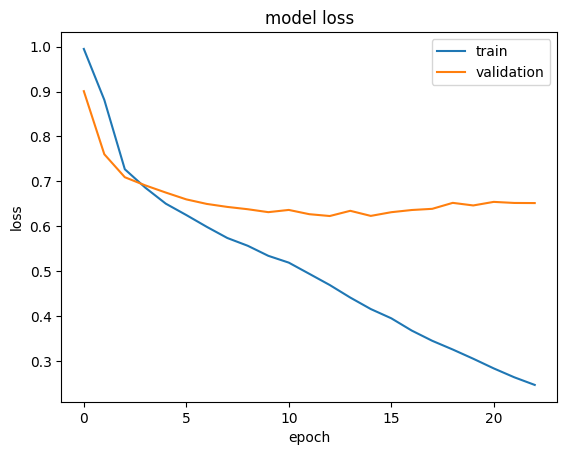

In [ ]:
pl.plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
# add axis labels and legend!!

**Figure 2:** The model loss as a function of epoch for both the training and the validation data. The training and validation model loss have similar behavior from epochs ~0-3. However, after epoch 3, differing behavior is then seen between these two. The training loss stays around ~0.65 after epoch ~6, while the validation loss visually seems to decrease linearly after epoch ~3. This could point to some potential overfitting of the model to the data, as it is getting better and better at describing the training data, but not actually "learning" from the validation data.

plot (visualize) the prediction and the ground truth for the test data. What do you see? where is the model succesful where is it not?

In [ ]:
model.predict?

In [ ]:
prediction = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


In [ ]:
prediction.shape

(6, 2516)

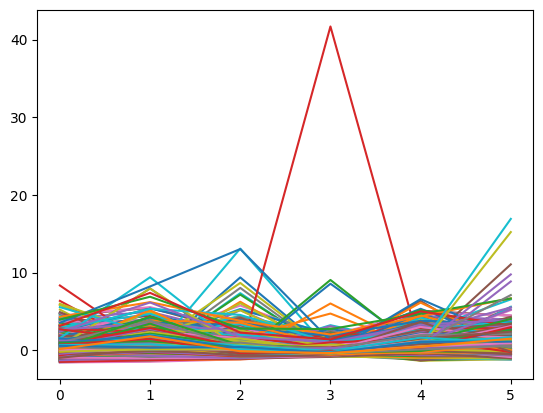

In [ ]:
pl.plot(prediction)
pl.plot(X_test)
pl.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


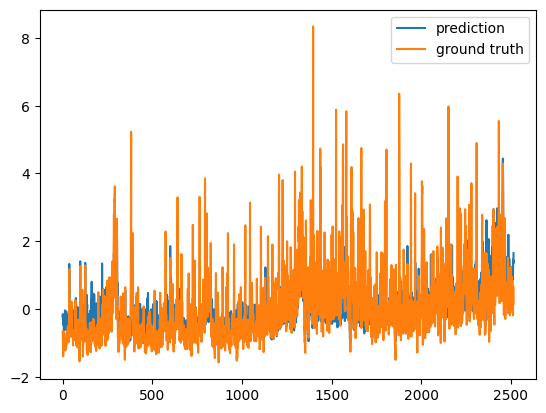

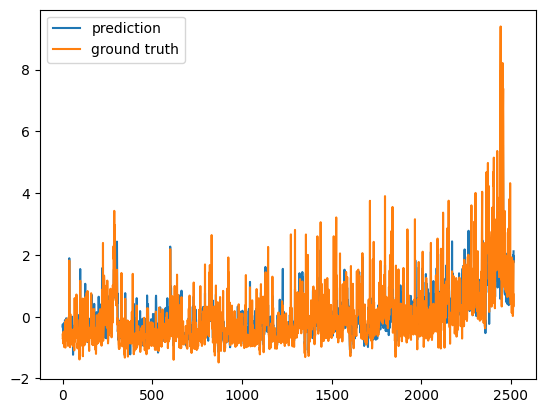

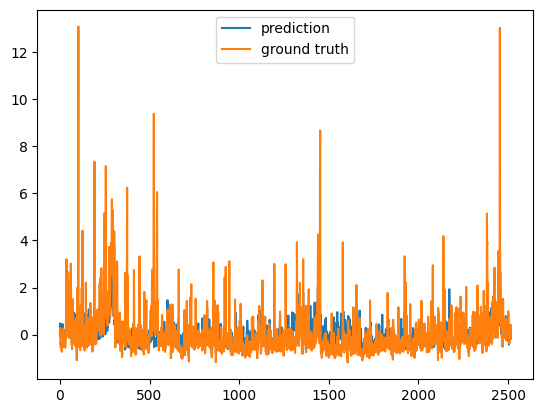

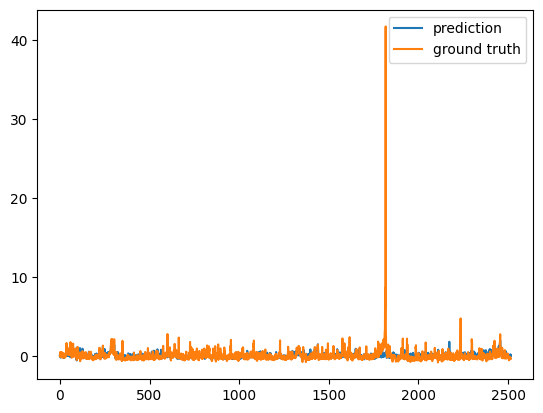

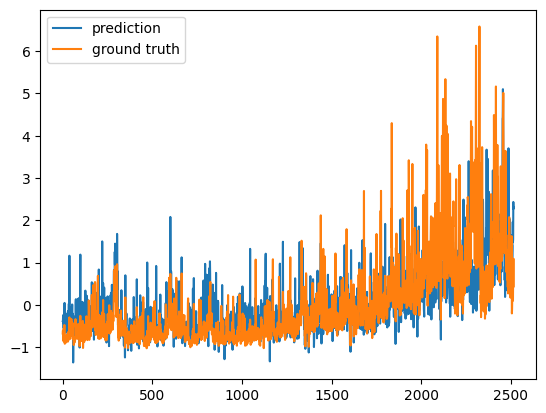

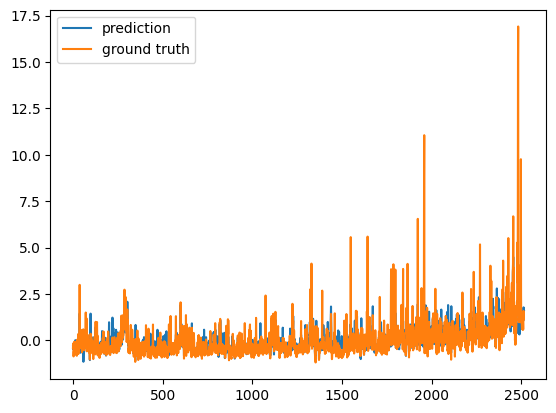

In [ ]:
prediction = model.predict(X_test)
for i,_ in enumerate(X_test):
  pl.plot(prediction[i], label = 'prediction')
  pl.plot(X_test[i], label = 'ground truth', linestyle = '-')
  pl.legend()
  pl.show()

**Figure 3:** The predicted and true (denoted as "ground truth") stock prices as a function of time. The prediction comes from the model trained earlier in this notebook. For all graphs, the prediction is seen to not entirely follow the ground truth data (as they are not directly overlapping each other). It is generally seen that the predicted data does not have as large fluctuations compared to the ground truth data. However, statements on how absolutely different they are are difficult to do in this scale without taking the difference in between the two at the same time. This difference is looked at in Figure 4.

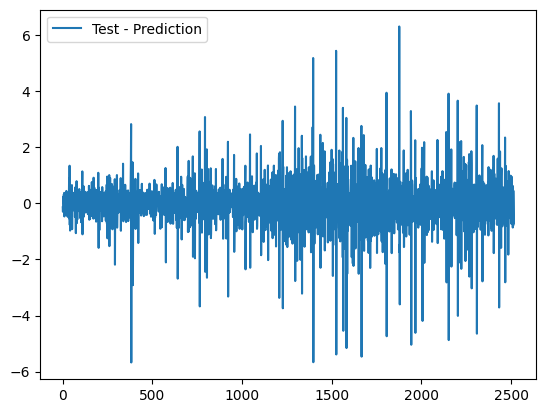

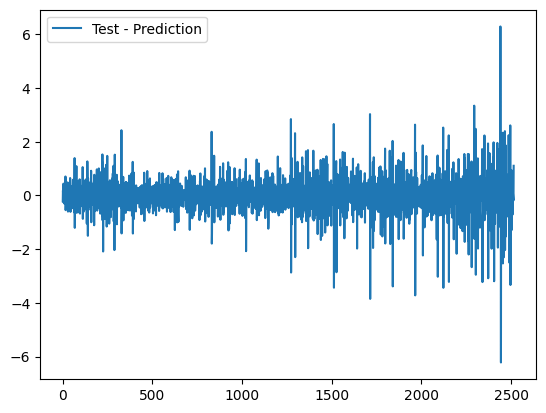

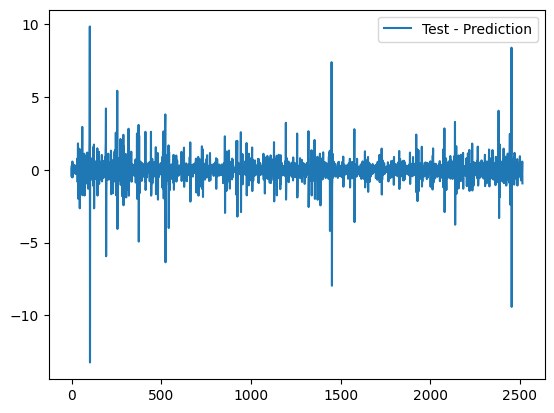

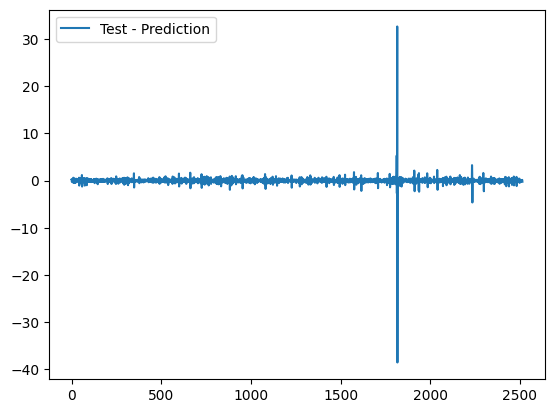

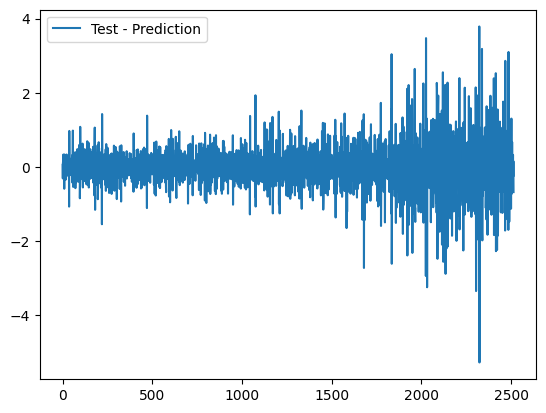

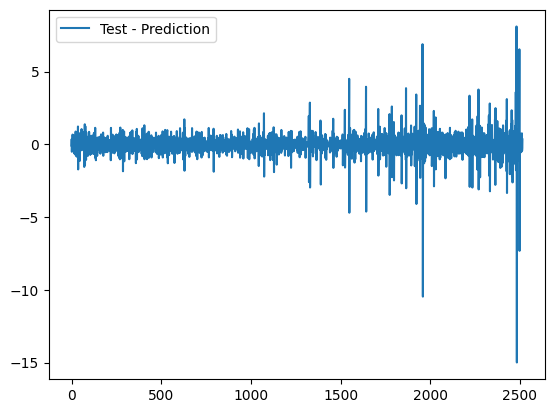

In [ ]:
for i,_ in enumerate(X_test):
  pl.plot(np.diff(X_test[i]-prediction[i]), label = 'Test - Prediction')
  #pl.plot(X_test[i], label = 'ground truth', linestyle = '-')
  pl.legend()
  pl.show()

**Figure 4:** The difference between the test and the predicton for different stock price time series. The test minus prediction graphs follow the same order of the graphs shown for Figure 3. Fluctuations are seen throughout all plots shown, where it seems equal in frequency of the test data being both greater than and less than the prediction data. Some differences from test to prediction value for some of the stock price data seems to stay at a relatively constant rate throughout the time. Some differences from test to prediction value seem to increase as time increases. In particular, for the one stock that had a delta function-like peak behavior, it is noted that the difference between the test and the prediction is quite large in comparison to the rest of the data in that series, signaling a poor fit for this stock price peak behavior. The difference in test minus prediction behavior between different stock prices also signals the model's potential difficulty in fitting these datasets simultaneously. This may point to more specialization needed for the model to different datasets, or from Figure 2, a consequence of the model overfitting the training data and not fitting the validation data well.